In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
pd.get_dummies(df['cp'],columns=['cp_1','cp_2','cp_3','cp_4'])

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [7]:
pd.DataFrame(pd.get_dummies(df['cp']),columns=['cp_1','cp_2','cp_3','cp_4'])

,cp_1,cp_2,cp_3,cp_4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
298,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN


In [8]:
cps=pd.get_dummies(df['cp']).rename(columns={0:'cp_1',1:'cp_2',2:'cp_3',3:'cp_4'})

In [9]:
df=pd.concat([df,cps],axis=1)
df.drop('cp',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [10]:
thals=pd.get_dummies(df['thal'])
thals

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [11]:
thals=pd.get_dummies(df['thal']).rename(columns={0:'thal_0',1:'thal_1',2:'thal_2',3:'thal_3'})

In [12]:
df=pd.concat([df,thals],axis=1)
df.drop('thal',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,0,1,0


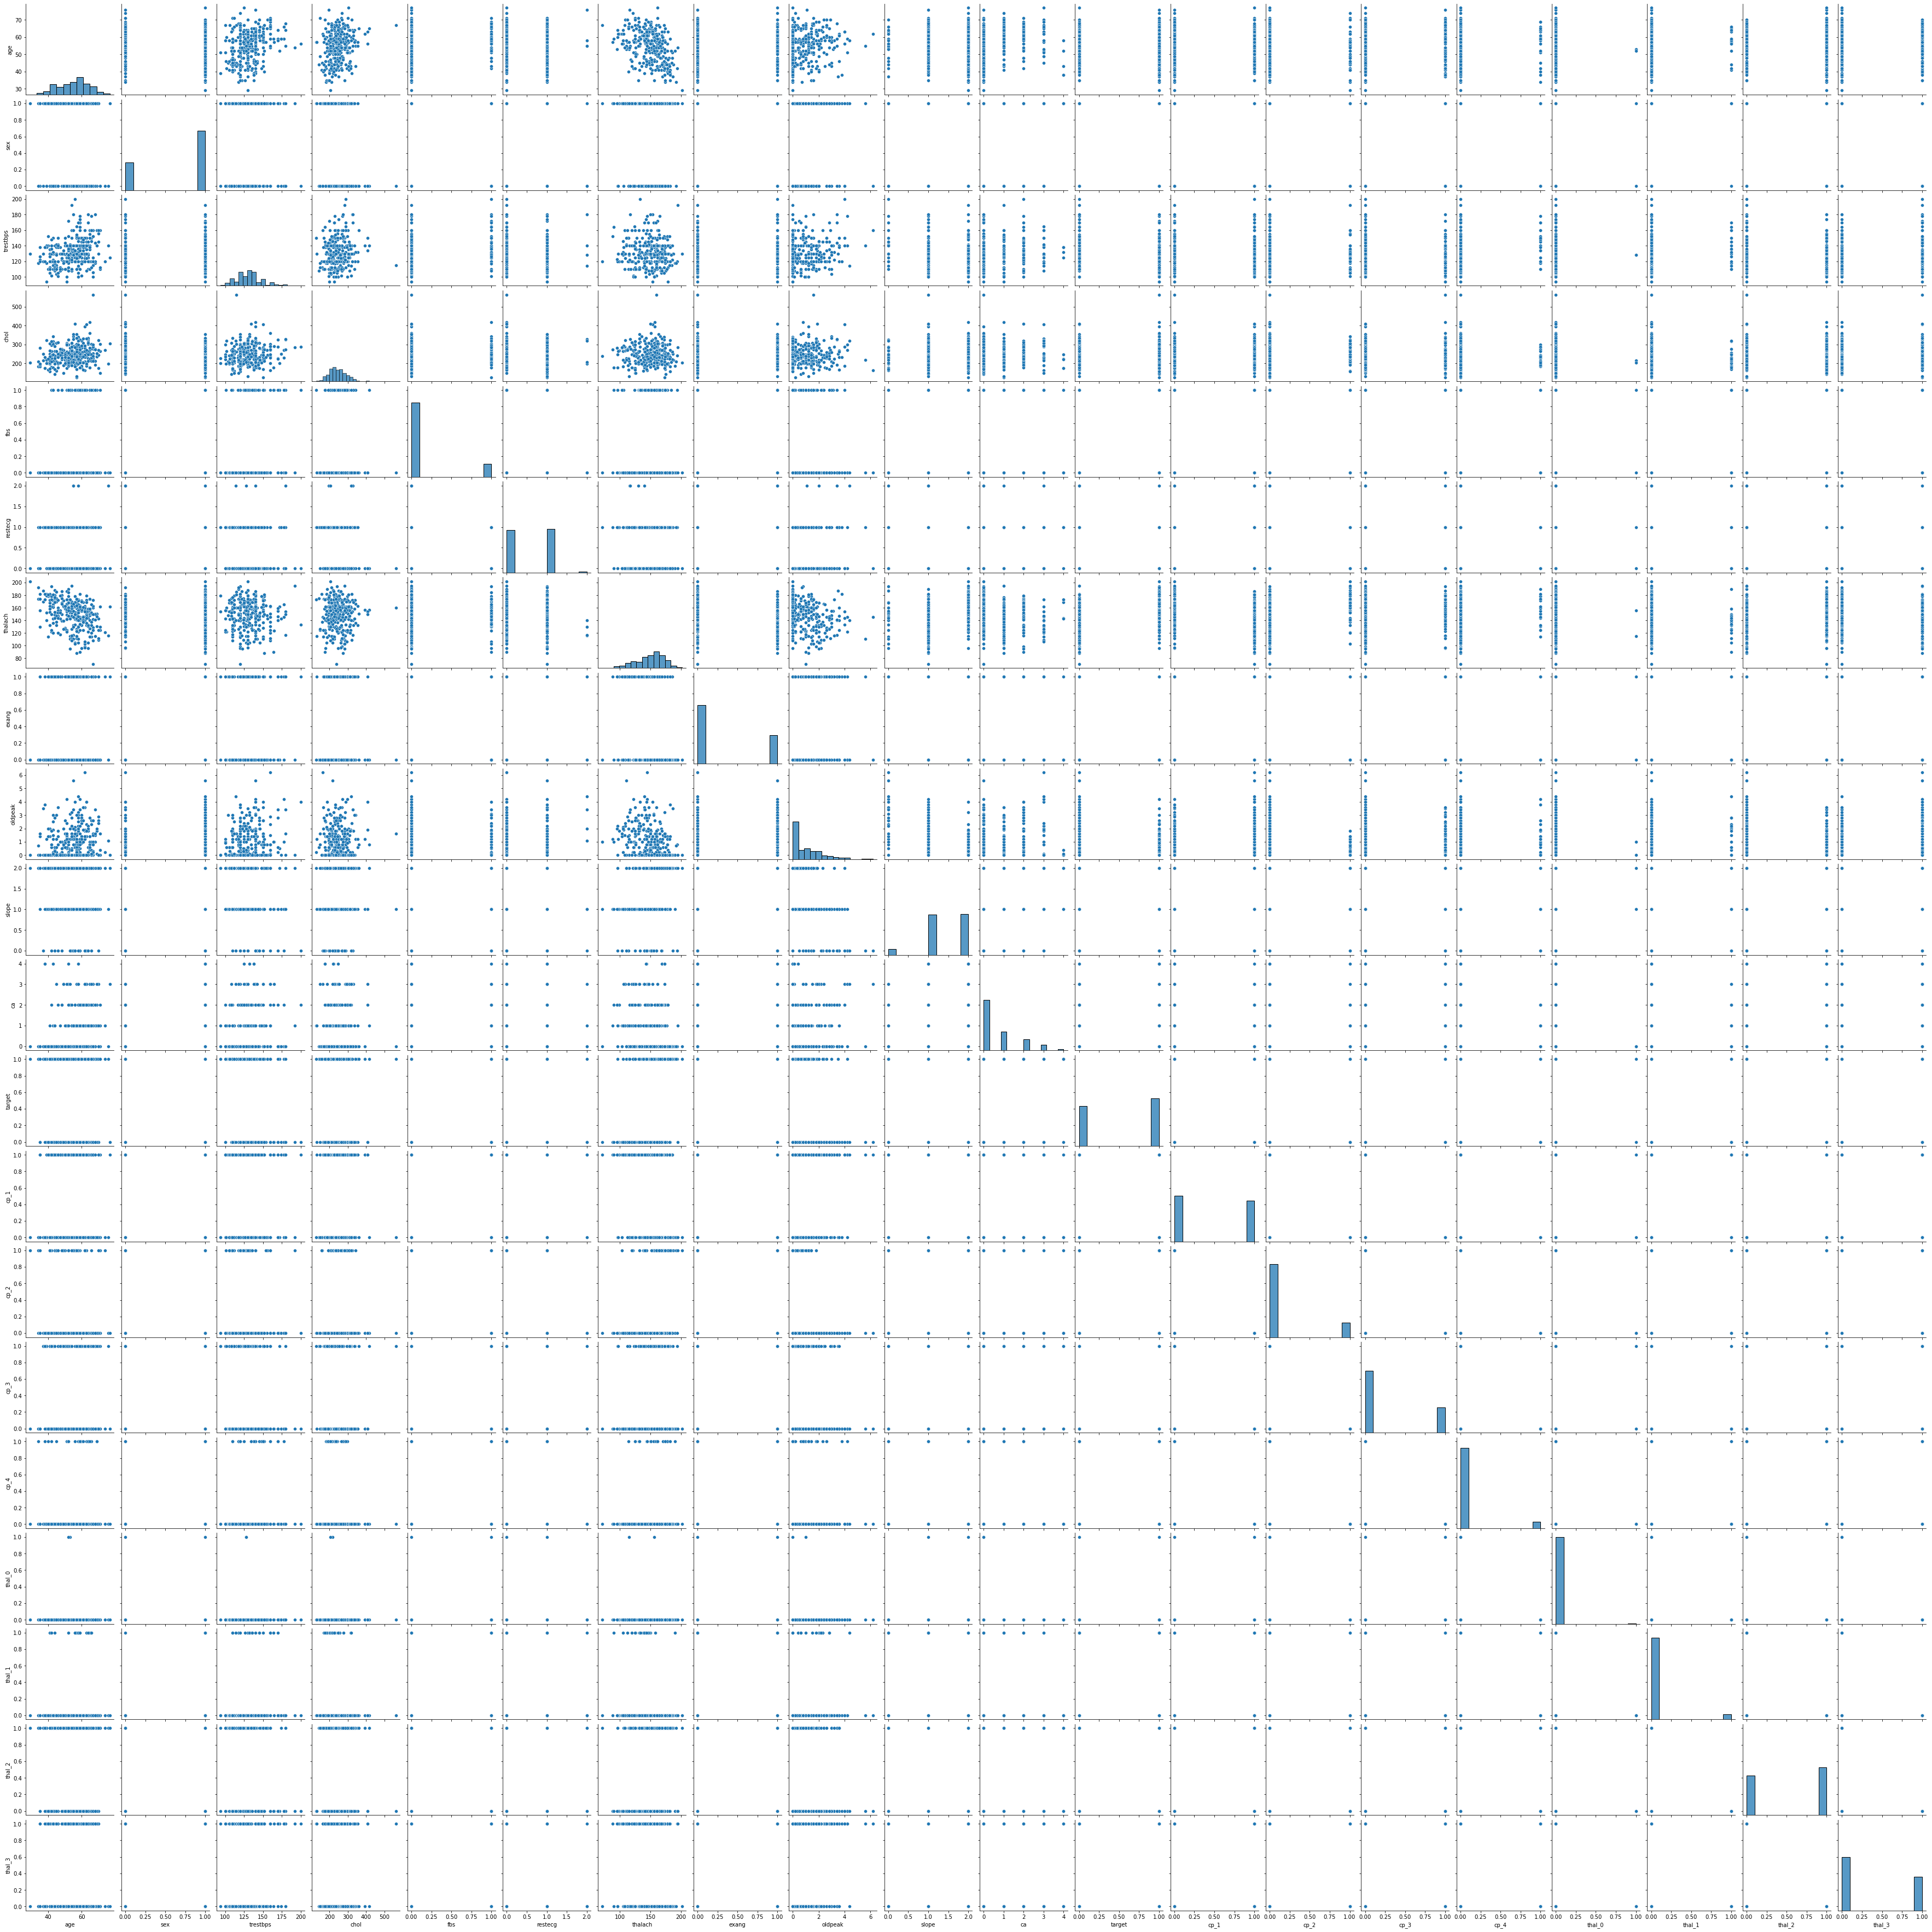

In [13]:
sns.pairplot(df)

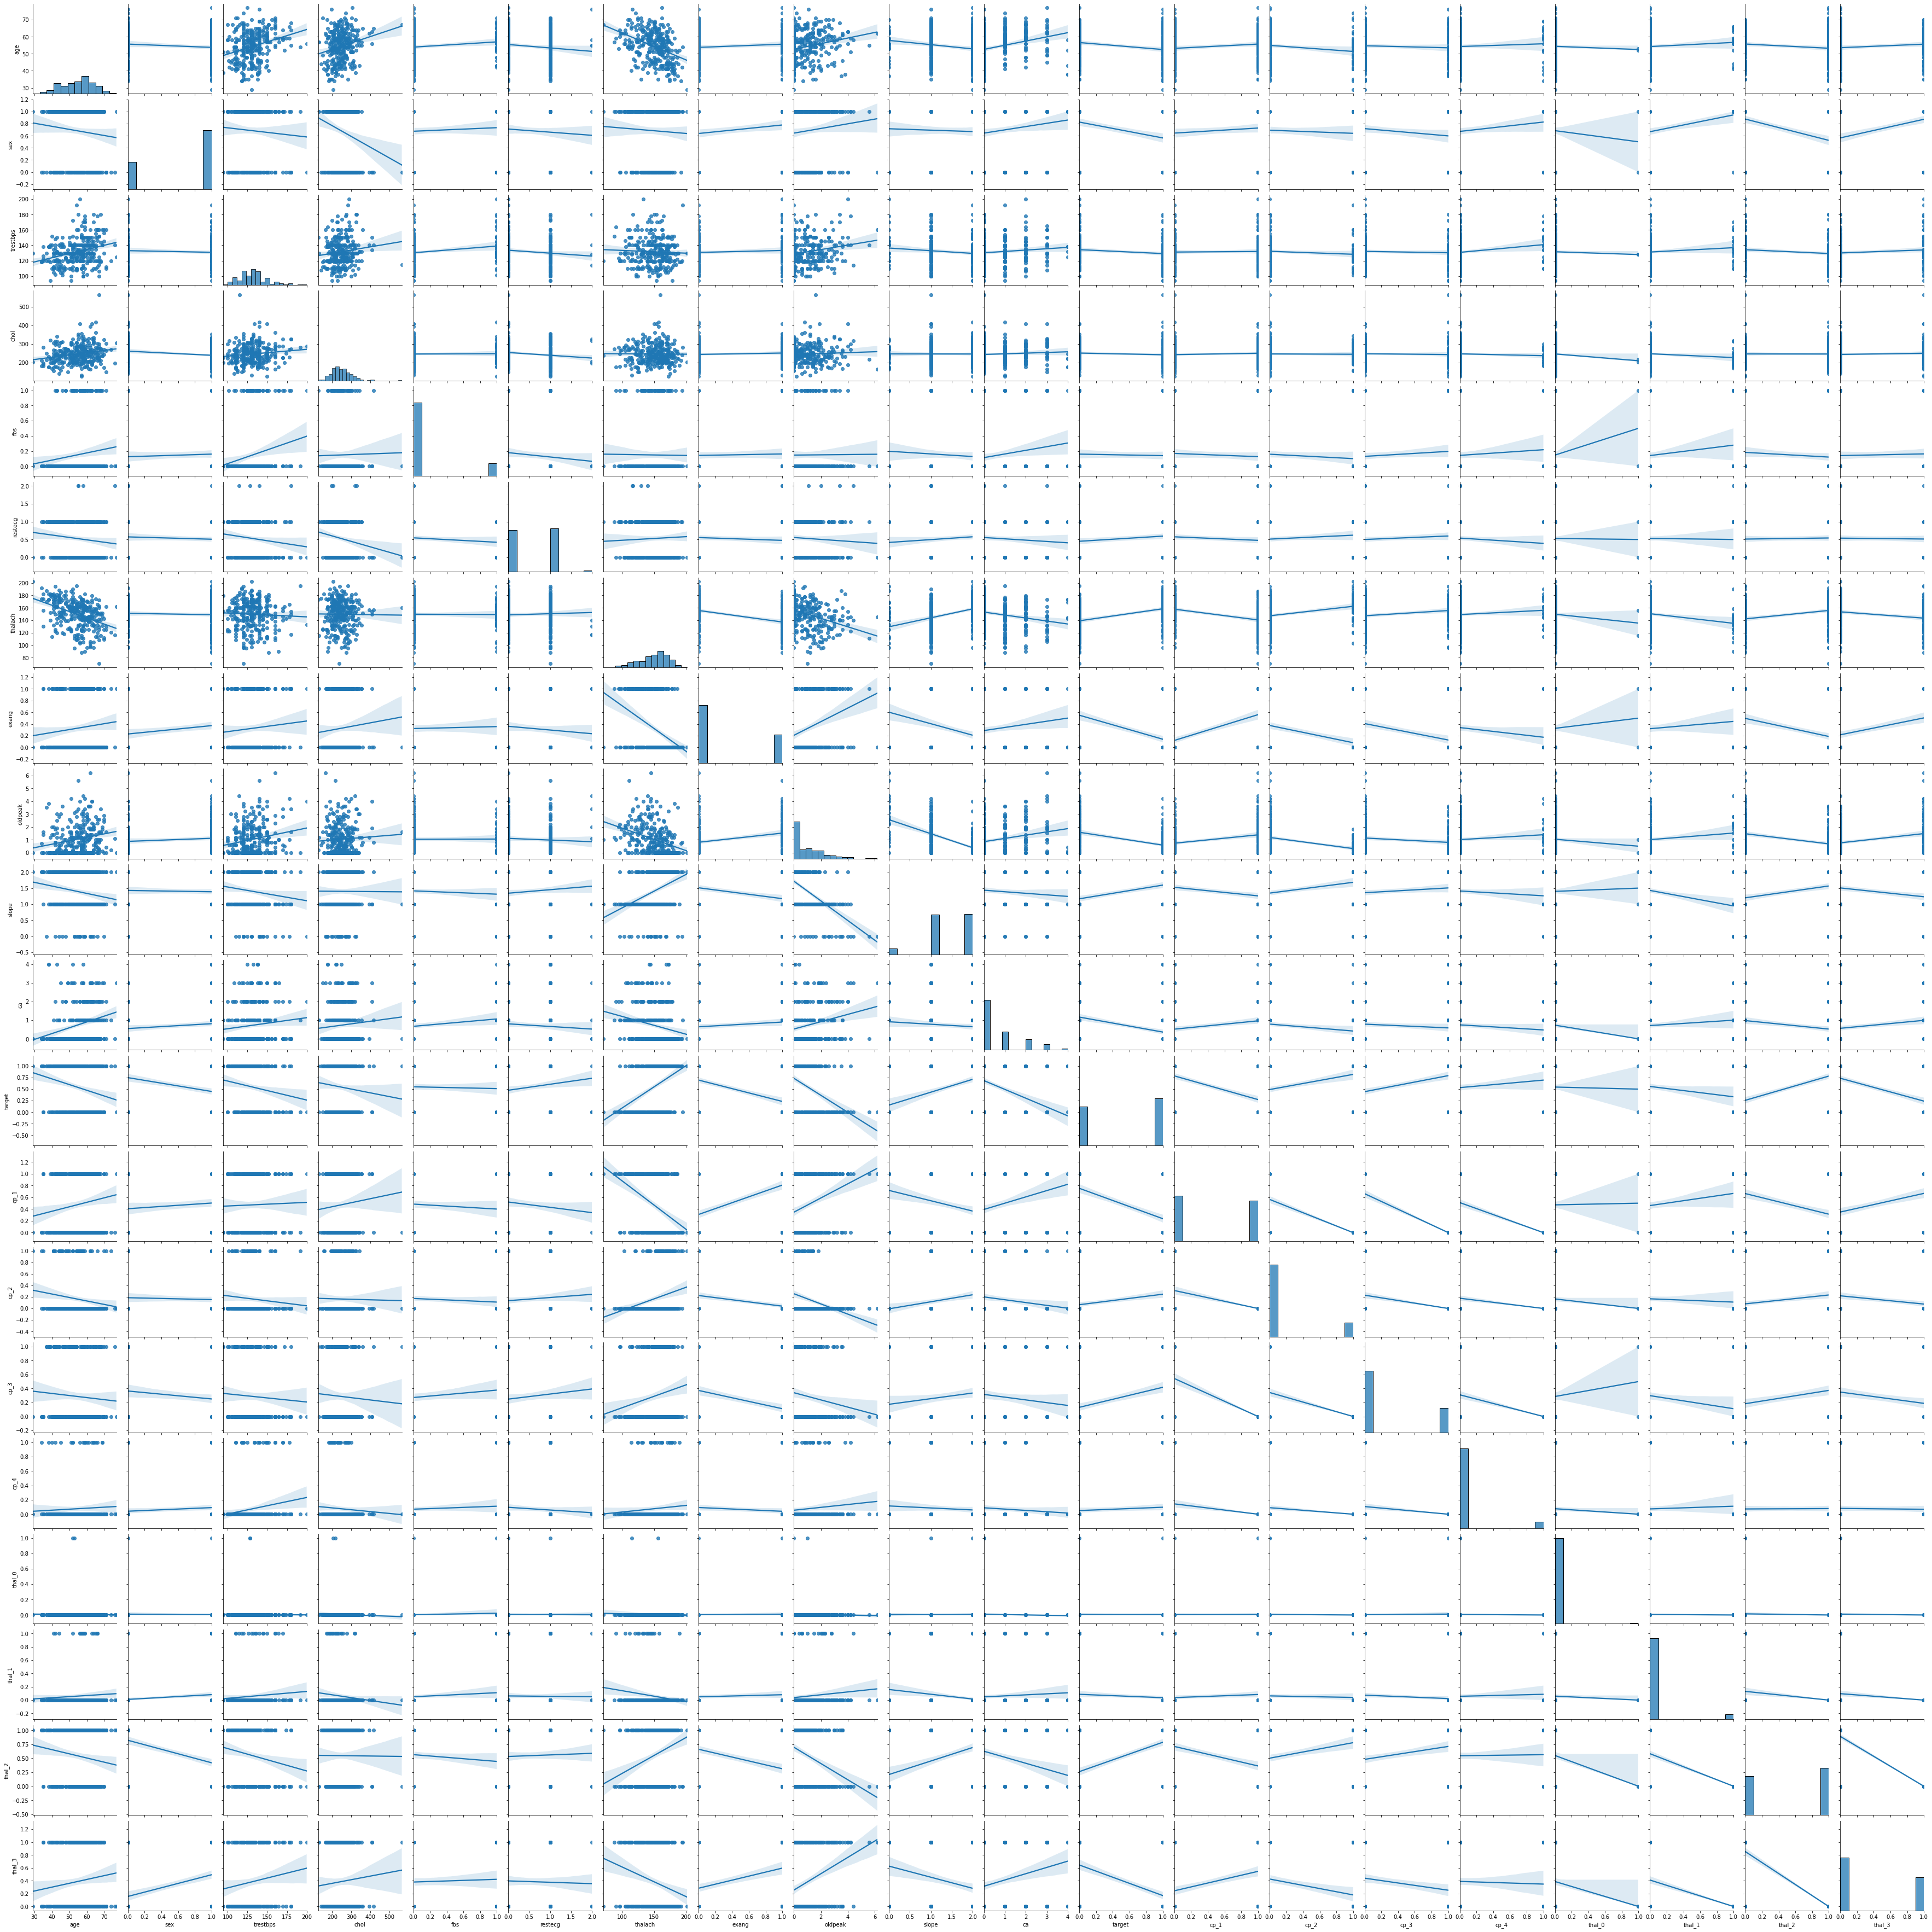

In [14]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

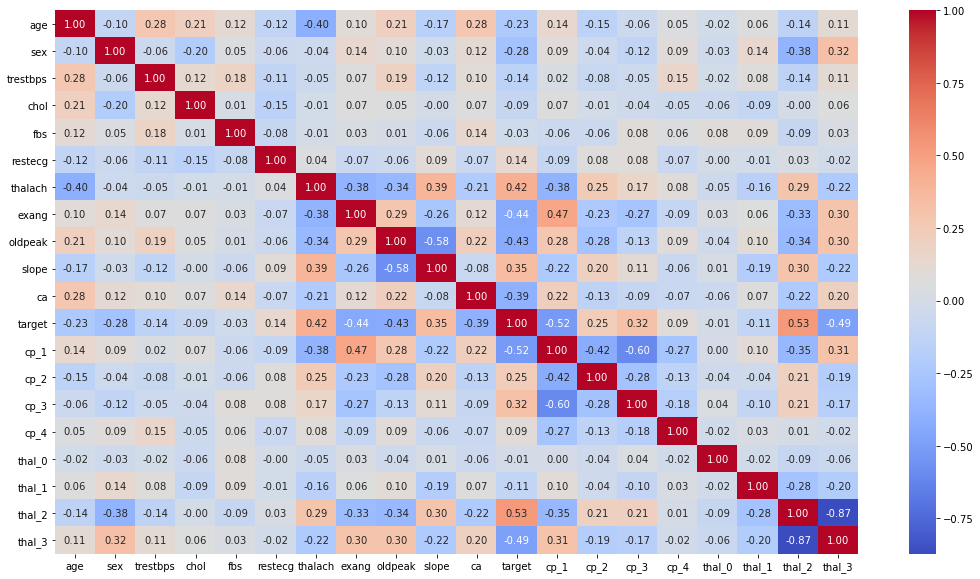

In [15]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='coolwarm',fmt='.2f',annot=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

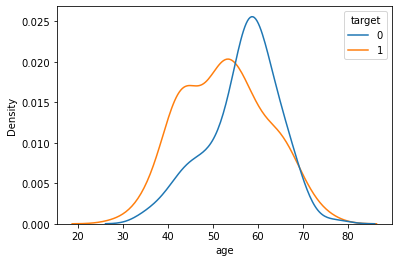

In [16]:
sns.kdeplot(data=df,x='age',hue='target')     #Kdeplot refer as density , hue is use to seprate data in various cetogry

<AxesSubplot:xlabel='sex', ylabel='Density'>

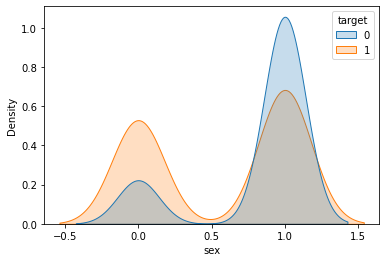

In [17]:
sns.kdeplot(data=df,x='sex',hue='target',shade=True)        #Shade is use for shading the curve

<AxesSubplot:xlabel='target', ylabel='count'>

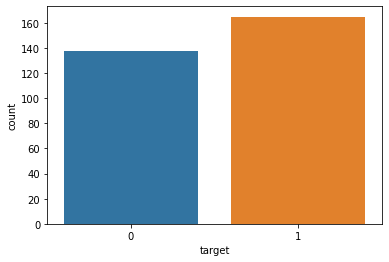

In [18]:
sns.countplot(data=df,x='target')               #countplot is define as graphical representation of value counts

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [20]:
x=df.drop('target',axis=1)
y=df['target']

In [21]:
x.describe(include='all')

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.471947,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.500038,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  cp_1      303 non-null    uint8  
 12  cp_2      303 non-null    uint8  
 13  cp_3      303 non-null    uint8  
 14  cp_4      303 non-null    uint8  
 15  thal_0    303 non-null    uint8  
 16  thal_1    303 non-null    uint8  
 17  thal_2    303 non-null    uint8  
 18  thal_3    303 non-null    uint8  
dtypes: float64(1), int64(10), uint8(8)
memory usage: 28.5 KB


In [23]:
x_sc=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)   # standardscaler is use to convert diffrent data type to same data type.
x_sc                                                                           #eg. int into flot or flot into int

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-0.945384,-0.444554,-0.634648,3.489114,-0.081514,3.979112,-1.100763,-0.793116
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.945384,-0.444554,1.575677,-0.286606,-0.081514,-0.251312,0.908461,-0.793116
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,-1.100763,1.260850
299,-1.033002,0.681005,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,-0.945384,-0.444554,-0.634648,3.489114,-0.081514,-0.251312,-1.100763,1.260850
300,1.503641,0.681005,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,-1.100763,1.260850
301,0.290464,0.681005,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,-1.100763,1.260850


In [24]:
x_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   trestbps  303 non-null    float64
 3   chol      303 non-null    float64
 4   fbs       303 non-null    float64
 5   restecg   303 non-null    float64
 6   thalach   303 non-null    float64
 7   exang     303 non-null    float64
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    float64
 10  ca        303 non-null    float64
 11  cp_1      303 non-null    float64
 12  cp_2      303 non-null    float64
 13  cp_3      303 non-null    float64
 14  cp_4      303 non-null    float64
 15  thal_0    303 non-null    float64
 16  thal_1    303 non-null    float64
 17  thal_2    303 non-null    float64
 18  thal_3    303 non-null    float64
dtypes: float64(19)
memory usage: 45.1 KB


In [25]:
x_sc.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,1.202192e-15,-3.297692e-16,3.341661e-16,1.183505e-16,-1.218314e-17,-1.282436e-17,6.020120e-16,4.125779e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
25%,-7.572802e-01,-1.468418e+00,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
50%,6.988599e-02,6.810052e-01,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,-7.931155e-01
75%,7.316189e-01,6.810052e-01,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.057772e+00,-4.445542e-01,1.575677e+00,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,1.260850e+00
max,2.496240e+00,6.810052e-01,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.057772e+00,2.249444e+00,1.575677e+00,3.489114e+00,1.226784e+01,3.979112e+00,9.084609e-01,1.260850e+00


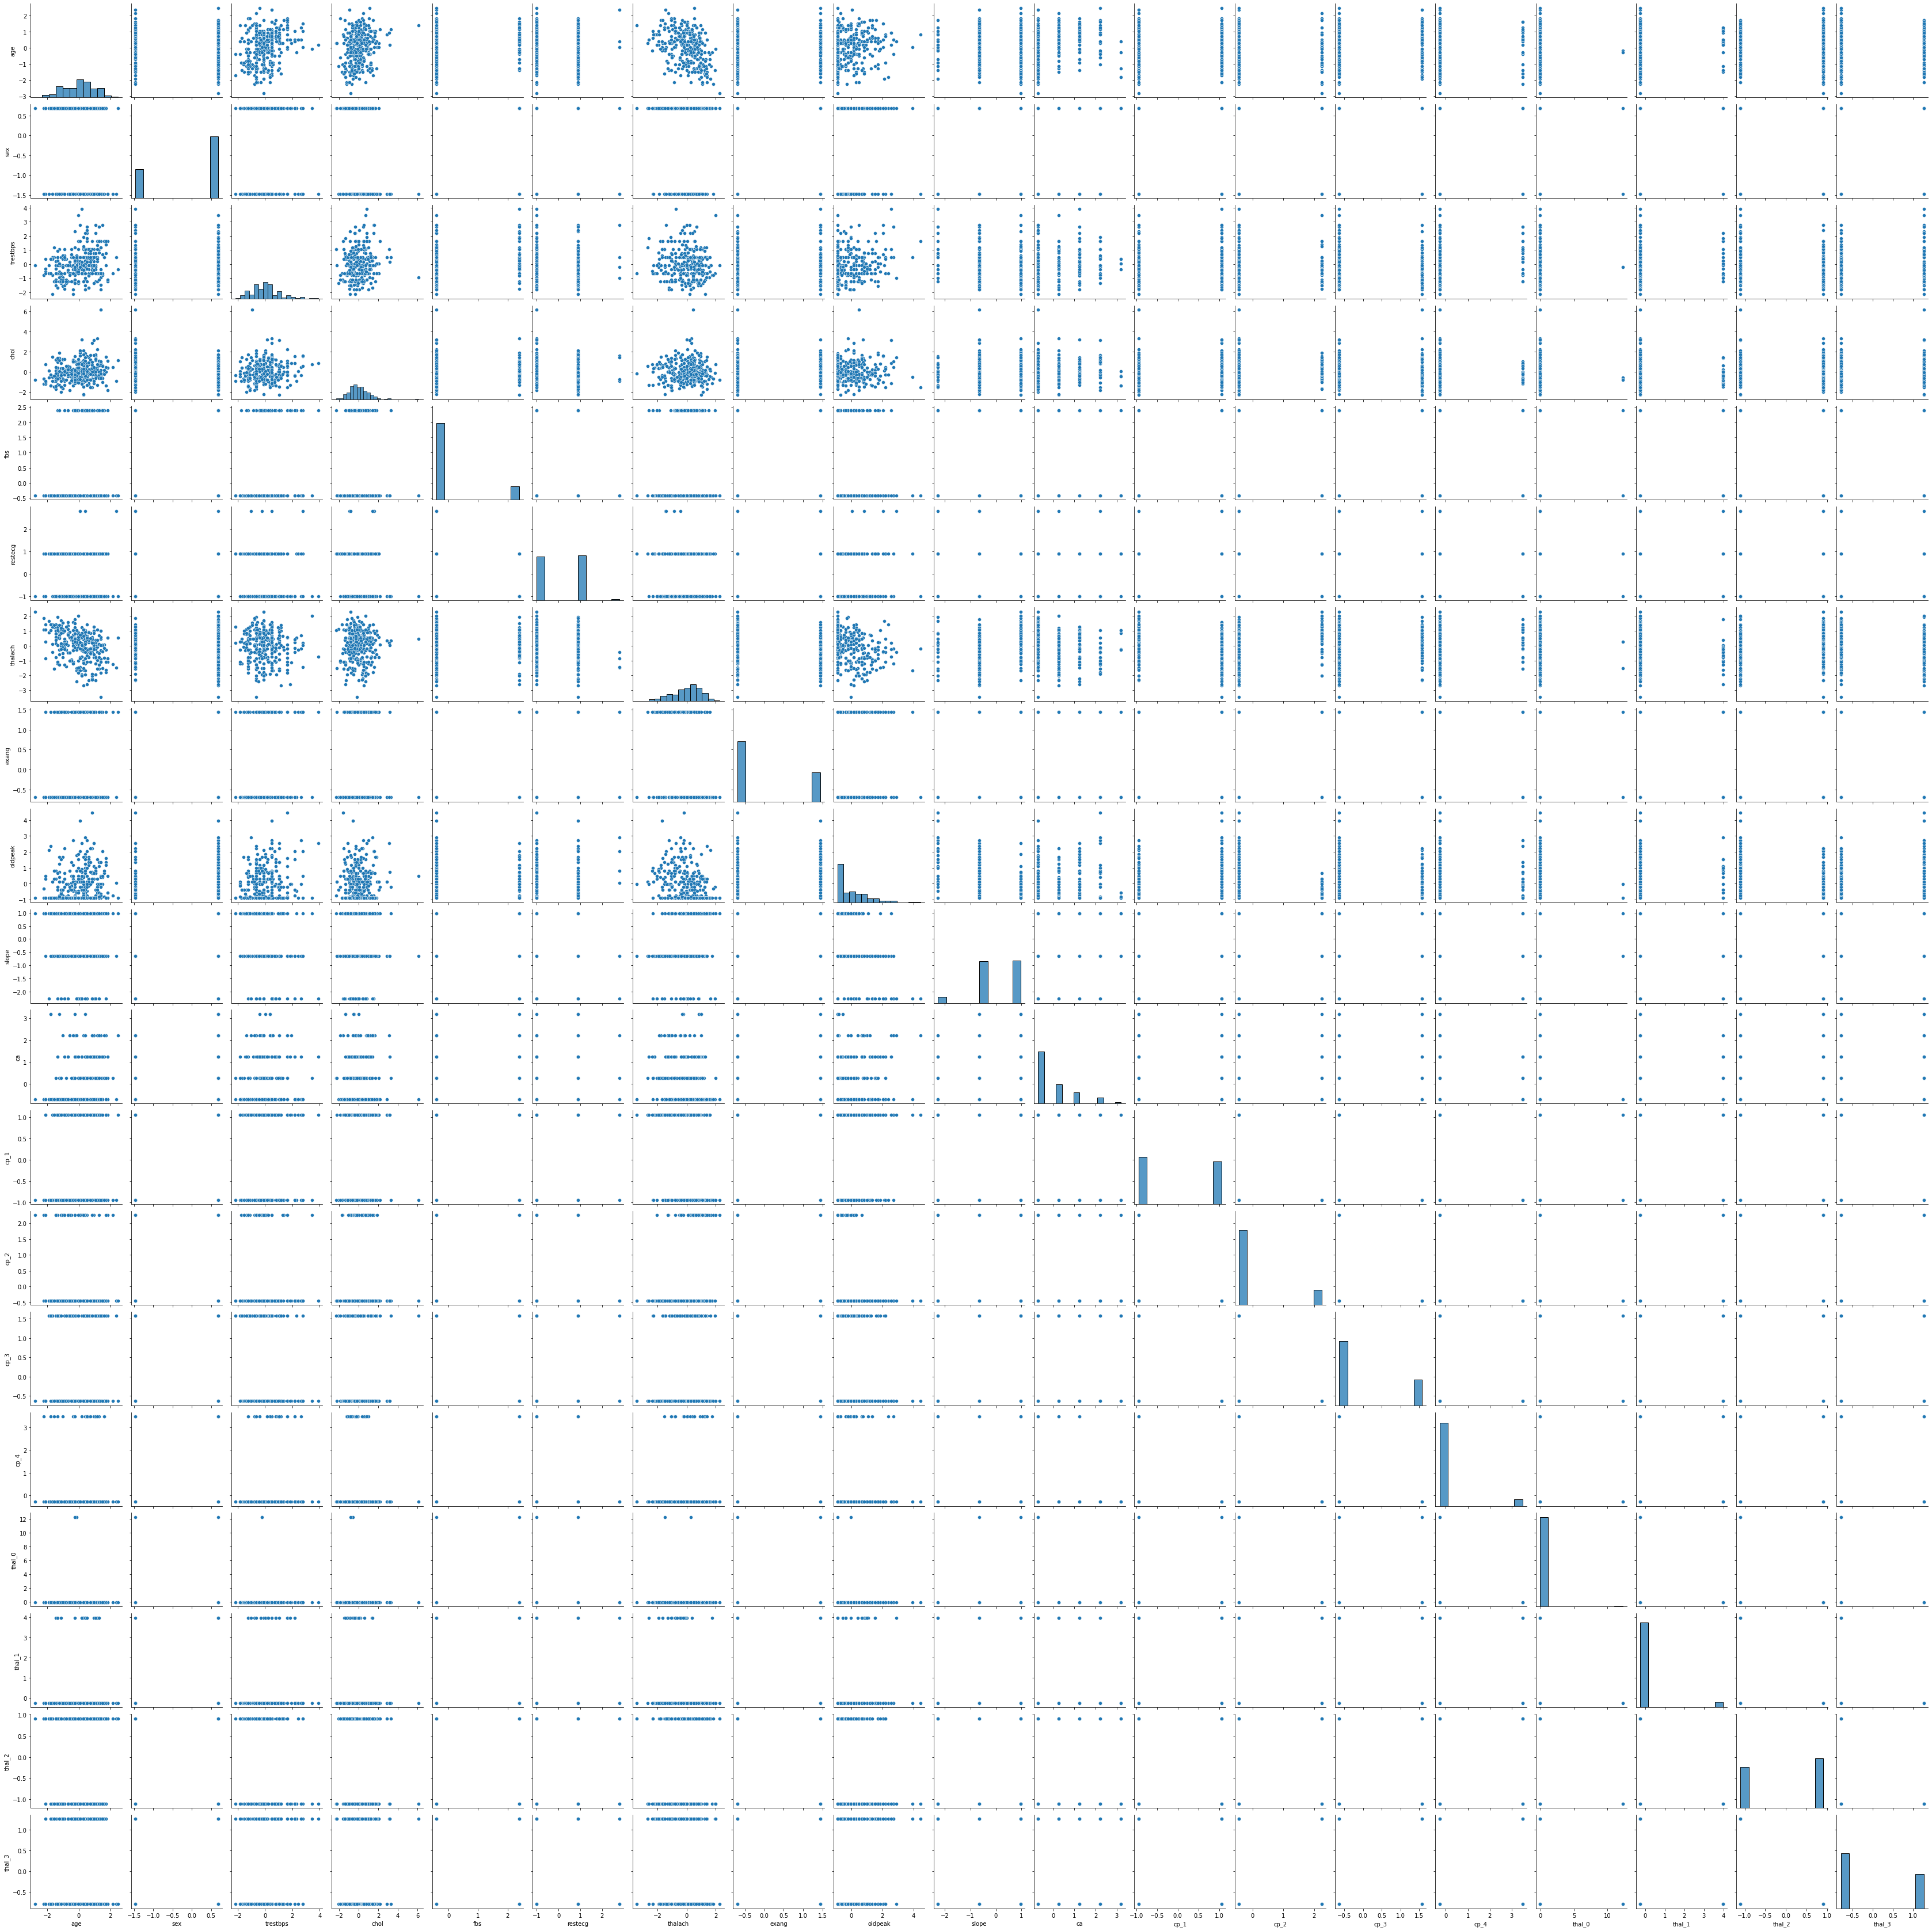

In [26]:
sns.pairplot(x_sc)

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y,test_size=0.3,random_state=101)

In [28]:
model=KNeighborsClassifier().fit(xtrain,ytrain)

In [29]:
model.score(xtest,ytest)*100

78.02197802197803

In [30]:
model.score(xtrain,ytrain)*100

88.20754716981132

In [31]:
model_1=KNeighborsClassifier(n_neighbors=10).fit(xtrain,ytrain)

In [32]:
model_1.score(xtrain,ytrain)*100

86.79245283018868

In [33]:
model_1.score(xtest,ytest)*100

86.81318681318682

In [34]:
scores=[]                     
for i in range(3,31):
    model_i=KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    scores.append(model_i.score(xtest,ytest))

Text(0.5, 1.0, 'Score vs neighbours')

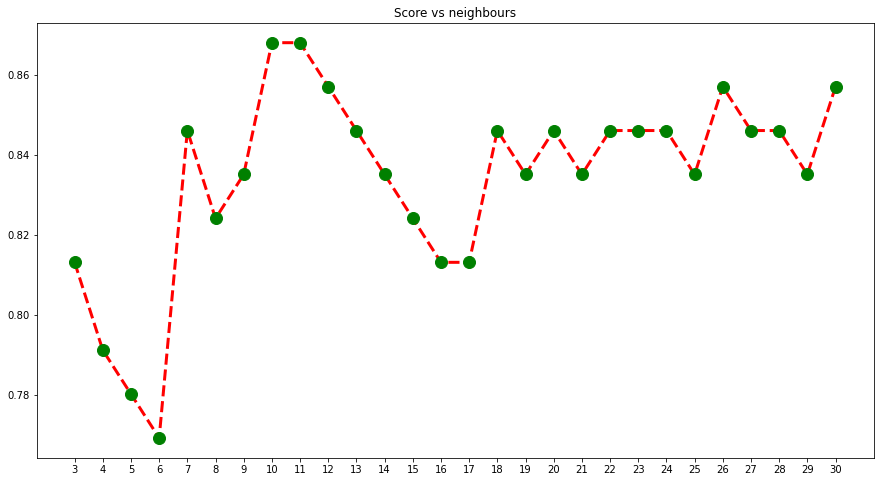

In [35]:
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores,color='r',linestyle='--',lw=3,marker='o',markerfacecolor='green',markeredgecolor='green',markersize=12)
plt.xticks(range(3,31))      #xticks is define as values of x axis
plt.title('Score vs neighbours')

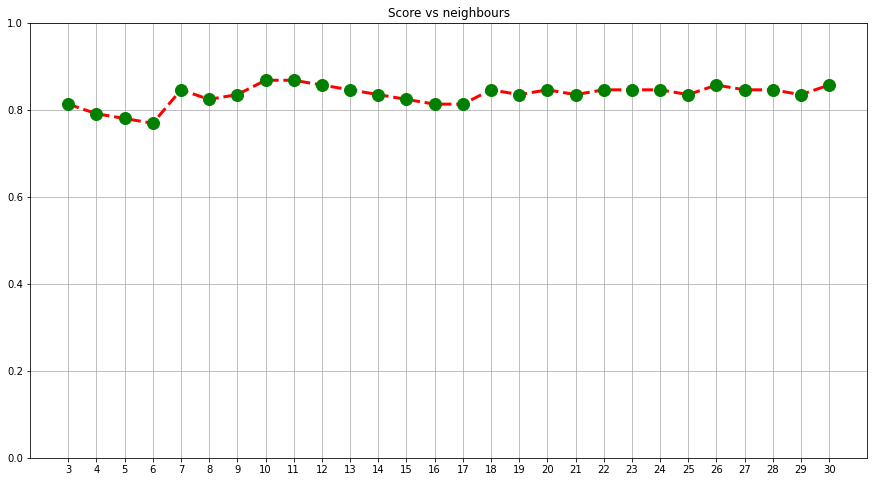

In [36]:
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores,color='r',linestyle='--',lw=3,marker='o',markerfacecolor='green',markeredgecolor='green',markersize=12)
plt.xticks(range(3,31))
plt.ylim([0,1])             #ylim is define as limit of y
plt.title('Score vs neighbours')
plt.grid()

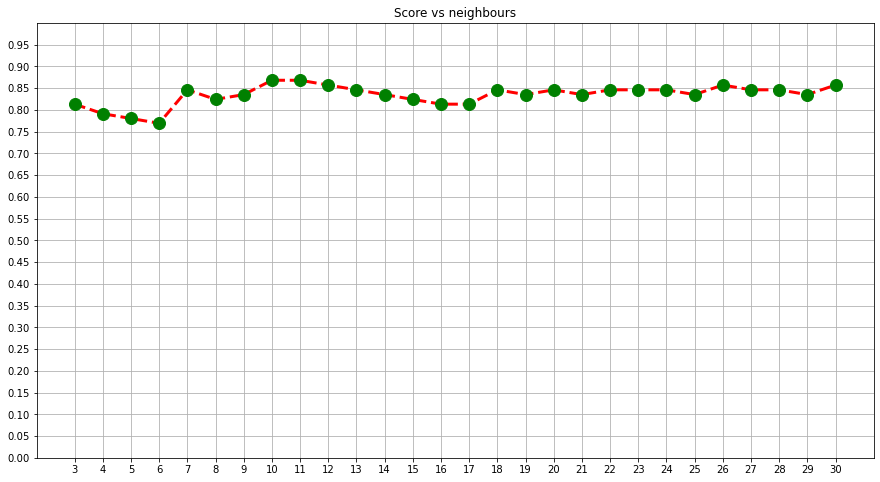

In [37]:
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores,color='r',linestyle='--',lw=3,marker='o',markerfacecolor='green',markeredgecolor='green',markersize=12)
plt.xticks(range(3,31))
plt.ylim([0,1])
plt.yticks(np.arange(0.0,1.0,0.05))
plt.title('Score vs neighbours')
plt.grid()

In [38]:
model_knn=KNeighborsClassifier(n_neighbors=10).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [39]:
from sklearn.svm import SVC

In [40]:
model_svc=SVC().fit(xtrain,ytrain)
print(round(model_svc.score(xtest,ytest)*100,2),'%')

83.52 %


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model_rf=RandomForestClassifier().fit(xtrain,ytrain)
print(round(model_rf.score(xtest,ytest)*100,2),'%')

83.52 %


In [43]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.3,random_state=101)

In [44]:
model_rf1=RandomForestClassifier().fit(xtrain1,ytrain1)
print(round(model_rf1.score(xtest1,ytest1)*100,2),'%')

82.42 %


In [45]:
from sklearn.ensemble import BaggingClassifier           # baggingClassifier is use to slitely improve the model on the basic of DecisionTreeClassifier,svc,knn,logistic and linear regression.

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_bag=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100).fit(xtrain,ytrain)       # estimators is rndom numbers
print(round(model_bag.score(xtest,ytest)*100,2),'%')

80.22 %


In [48]:
model_bag2=BaggingClassifier(SVC(),n_estimators=50).fit(xtrain,ytrain)
print(round(model_bag2.score(xtest,ytest)*100,2),'%')

83.52 %


In [49]:
model_bag3=BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=50).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

83.52 %


In [50]:
model_bag4=BaggingClassifier(LogisticRegression(),n_estimators=50).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

83.52 %


In [51]:
model_bag5=BaggingClassifier(LinearRegression(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

83.52 %


In [52]:
import xgboost as xgb

In [53]:
model_xgb = xgb.XGBClassifier().fit(xtrain,ytrain)

[22:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
print(round(model_xgb.score(xtest,ytest)*100,2),'%')

80.22 %


In [55]:
model_legit=LogisticRegression().fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

83.52 %


In [56]:
model_knn=KNeighborsClassifier(n_neighbors=10).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [57]:
pd.to_pickle(model_knn,'Heart.pkl')

In [58]:
m=pd.read_pickle('Heart.pkl')

In [60]:
x.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,0,1,0,0,0,1,0


In [68]:
age=eval(input('Enter your age'))
sex=eval(input('Enter your sex'))
trestbps=eval(input('Enter your trestbps'))
chol=eval(input('Enter your chol'))
fbs=eval(input('Enter your fbs'))
restecg=eval(input('Enter your restecg'))
thalach=eval(input('Enter your thalach'))
exang=eval(input('Enter your exang'))
oldpeak=eval(input('Enter your oldpeak'))
slope=eval(input('Enter your slop'))
ca=eval(input('Enter your ca'))
cp_1=eval(input('Enter your cp_1'))
cp_2=eval(input('Enter your cp_2'))
cp_3=eval(input('Enter your cp_3'))
cp_4=eval(input('Enter your cp_4'))
thal_0=eval(input('Enter your thal_0'))
thal_1=eval(input('Enter your thal_1'))
thal_2=eval(input('Enter your thal_2'))
thal_3=eval(input('Enter your thal_3'))


query=pd.DataFrame({'age':[age],'sex':[sex],'trestbps':[trestbps],'chol':[chol],'fbs':[fbs],'restecg':[restecg],'thalach':[thalach],'exang':[exang],'oldpeak':[oldpeak],'slope':[slope],'ca':[ca],'cp_1':[cp_1],'cp_2':[cp_2],'cp_3':[cp_3],'cp_4':[cp_4],'thal_0':[thal_0],'thal_1':[thal_1],'thal_2':[thal_2],'thal_3':[thal_3]})

Enter your age 63
Enter your sex 1
Enter your trestbps 145
Enter your chol 233
Enter your fbs 1
Enter your restecg 0
Enter your thalach 150
Enter your exang 0
Enter your oldpeak 2.3
Enter your slop 0
Enter your ca 0
Enter your cp_1 0
Enter your cp_2 0
Enter your cp_3 0
Enter your cp_4 1
Enter your thal_0 0
Enter your thal_1 1
Enter your thal_2 0
Enter your thal_3 0


In [69]:
query

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,0,1,0,1,0,0


In [70]:
m.predict(query)

array([0], dtype=int64)